In [1]:
# Train model to find cows - Quinn Vaughn

In [2]:
# Needed Imports
import glob
#from google.colab import drive

import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.image as img
from matplotlib import pyplot

from PIL import Image

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K

%matplotlib inline

In [3]:
# Load photos without cows
no_cows = glob.glob('C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aNotCows\\*.jpg')
print("Number of files: {}".format(len(no_cows)))

cows = glob.glob('C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aCows\\*.jpg')
print("Number of files: {}".format(len(cows)))

Number of files: 2467
Number of files: 623


In [4]:
# Concat (merge) the files
dataset = no_cows + cows

# Create labels for the files
data_labels = []

# Append to labels.
# No cows = 0
# Cows = 1
for i in range(len(no_cows)):
    data_labels.append(0)
for i in range(len(cows)):
    data_labels.append(1)

# Confirm data is correct
print(data_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
# Split data into training and testing data (20% becomes testing data)
X_train, X_test, y_train, y_test = train_test_split(dataset, data_labels, test_size=0.2, random_state=42)

# Print to confirm not empty
print("X_train: " + str(X_train))
print("X_train length: " + str(len(X_train)))
print("y_train: " + str(y_train) + '\n')

# Print to confirm not empty
print("X_test: " + str(X_test))
print("X_test length: " + str(len(X_test)))
print("y_test: " + str(y_test))

X_train: ['C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aCows\\screen14_432_1152.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aNotCows\\screen10_144_1728.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aCows\\screen14_576_576.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aNotCows\\screen3_288_576 - Copy.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aNotCows\\screen33_144_1008.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aNotCows\\screen34_864_1440.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aNotCows\\screen98_576_1728.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollection\\imagetiles\\aNotCows\\screen18_288_720.jpg', 'C:\\Users\\Student\\Downloads\\QuinnV\\finalproject\\datacollect

In [6]:
# Initalize test and training datasets
train_data = []
test_data = []

# Append picture matrix
for file in X_train:
    pic = Image.open(file)
    pic = pic.convert('RGB')
    pic = np.asarray(pic)
    train_data.append(pic)

# Append picture matrix
for file in X_test:
    pic = Image.open(file)
    pic = pic.convert('RGB')
    pic = np.asarray(pic)
    #pic = image.to_rgb(pic)
    test_data.append(pic)

print("train_data length: " + str(len(train_data)))
#print("train_data[0].shape: " + str(train_data[0].shape))
print(str(y_train)+"\n")

print("test_data length: " + str(len(test_data)))
print(y_test)

train_data length: 2472
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [7]:
# Cast datasets as np arrays
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

# Cast label arrays as np arrays
train_labels = np.asarray(y_train)
test_labels = np.asarray(y_test)

# Print to confirm conversion
print("train_data: " + str(train_data.shape) + " " + str(type(train_data)))
print("test_data: " + str(test_data.shape) + " " + str(type(test_data)))
print("train_labels: " + str(train_labels.shape) + " " + str(type(train_labels)))
print("test_lables: " + str(test_labels.shape) + " " + str(type(test_labels)))

train_data: (2472, 144, 144, 3) <class 'numpy.ndarray'>
test_data: (618, 144, 144, 3) <class 'numpy.ndarray'>
train_labels: (2472,) <class 'numpy.ndarray'>
test_lables: (618,) <class 'numpy.ndarray'>


In [8]:
# Reformat the data to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
print(train_data)
print(test_data)

[[[[ 92. 104.  23.]
   [ 92. 104.  23.]
   [ 92. 104.  23.]
   ...
   [ 88. 100.  23.]
   [ 88. 100.  23.]
   [ 88. 100.  23.]]

  [[ 92. 104.  23.]
   [ 92. 104.  23.]
   [ 92. 104.  23.]
   ...
   [ 88. 100.  23.]
   [ 88. 100.  23.]
   [ 88. 100.  23.]]

  [[ 92. 104.  23.]
   [ 92. 104.  23.]
   [ 92. 104.  23.]
   ...
   [ 88. 100.  19.]
   [ 88. 100.  20.]
   [ 88. 100.  22.]]

  ...

  [[ 92. 104.  23.]
   [ 92. 104.  23.]
   [ 92. 104.  23.]
   ...
   [ 85.  96.  21.]
   [ 85.  96.  21.]
   [ 85.  96.  21.]]

  [[ 92. 104.  23.]
   [ 92. 104.  23.]
   [ 92. 104.  23.]
   ...
   [ 85.  96.  21.]
   [ 85.  96.  21.]
   [ 85.  96.  21.]]

  [[ 92. 104.  23.]
   [ 92. 104.  23.]
   [ 92. 104.  23.]
   ...
   [ 85.  96.  21.]
   [ 85.  96.  21.]
   [ 85.  96.  21.]]]


 [[[197. 198.  16.]
   [197. 198.  14.]
   [166. 169.  13.]
   ...
   [133. 139.  49.]
   [133. 139.  49.]
   [133. 139.  49.]]

  [[253. 253.  15.]
   [253. 253.  13.]
   [213. 213.  12.]
   ...
   [133. 139.  49.]
 

In [9]:
# Normalize the values by dividing by 255
train_data /= 255
test_data /= 255

In [10]:
# Convert the labels using one-hot encoding 
num_classes = 2
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

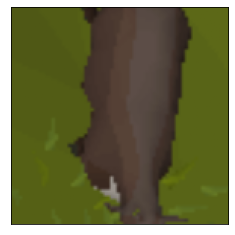

In [11]:
# Plot Image Function From iDtech gameplan
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

# First image of test set plotted
plot_image(test_data, 0, test_labels)

In [12]:
# Initialization of variables needed for model creation and testing
epochs = 10
batch_size = 200
img_rows = 144
img_cols = 144

input_shape = (img_rows, img_cols, 3, 1)

In [13]:
# SIMPLE 1-LAYER 2D-CNN

# Model Initialization
model = Sequential() 

# Model Layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
# Output layer
model.add(Dense(units=2,activation='softmax'))

# Prints a summary table of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 142, 1, 64)   640       
                                                                 
 flatten (Flatten)           (None, 1308672)           0         
                                                                 
 dense (Dense)               (None, 64)                83755072  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 83,764,162
Trainable params: 83,764,162
No

In [14]:
# Model Compilation
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy'])

In [15]:
# Model Training (Fitting)
model.fit(train_data, train_labels,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(test_data, test_labels),
           shuffle=True)

Epoch 1/10
13/13 [==============================] - 29s 2s/step - loss: 3.3418 - accuracy: 0.7002 - val_loss: 1.0378 - val_accuracy: 0.7977
Epoch 2/10
13/13 [==============================] - 27s 2s/step - loss: 0.6133 - accuracy: 0.7913 - val_loss: 0.4674 - val_accuracy: 0.8107
Epoch 3/10
13/13 [==============================] - 28s 2s/step - loss: 0.4277 - accuracy: 0.8062 - val_loss: 0.4120 - val_accuracy: 0.8172
Epoch 4/10
13/13 [==============================] - 28s 2s/step - loss: 0.3699 - accuracy: 0.8471 - val_loss: 0.3642 - val_accuracy: 0.8301
Epoch 5/10
13/13 [==============================] - 27s 2s/step - loss: 0.3290 - accuracy: 0.8697 - val_loss: 0.3190 - val_accuracy: 0.8786
Epoch 6/10
13/13 [==============================] - 27s 2s/step - loss: 0.2672 - accuracy: 0.9009 - val_loss: 0.2712 - val_accuracy: 0.8932
Epoch 7/10
13/13 [==============================] - 28s 2s/step - loss: 0.2296 - accuracy: 0.9163 - val_loss: 0.2780 - val_accuracy: 0.8916
Epoch 8/10
13/13 [==

In [16]:
# Model Evaluation
scores = model.evaluate(test_data, test_labels,verbose=0) 
print('Test accuracy:', scores[1])

Test accuracy: 0.9352750778198242


In [18]:
model.save('cow_model.h5')